<a href="https://colab.research.google.com/github/mdmmal/OperationsResearch_Class/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 04**

Set 03 Problem 3 as Stated.

In [ ]:
Problem:
Maximize P = 3x + 2y
Subject to:
  x + y ≥ 8
  8x + y ≥ 9
  x ≥ 0
  y ≥ 0


Corner Points

In [ ]:
import numpy as np

# equations as Ax=b
M = np.array([[1,1],[8,1]])
v = np.array([8,9])
intersection = np.linalg.solve(M,v)
print("Intersection:", intersection)

# Other corners with axes
corner1 = [0,9]
corner2 = [9,0]
corner3 = [8,0]
corner4 = [0,8]

print("Corners:")
print(corner1, corner2, corner3, corner4, intersection)


Intersection: [0.14285714 7.85714286]
Corners:
[0, 9] [9, 0] [8, 0] [0, 8] [0.14285714 7.85714286]


Graph feasible set

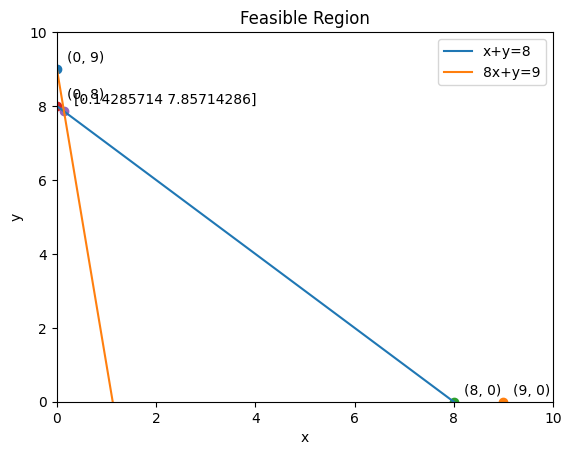

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0,10,200)
y1 = 8 - x      # line x+y=8
y2 = 9 - 8*x    # line 8x+y=9

plt.plot(x,y1,label="x+y=8")
plt.plot(x,y2,label="8x+y=9")

plt.xlim(0,10)
plt.ylim(0,10)

# Mark corners
points = [(0,9),(9,0),(8,0),(0,8),intersection]
for p in points:
    plt.scatter(*p)
    plt.text(p[0]+0.2,p[1]+0.2,f"{p}")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Feasible Region")
plt.show()


Find corner that maximizes objective

In [ ]:
c = [3,2]
for p in [(0,9),(9,0),(8,0),(0,8),intersection]:
    P = c[0]*p[0] + c[1]*p[1]
    print(p, "-> P =", P)


(0, 9) -> P = 18
(9, 0) -> P = 27
(8, 0) -> P = 24
(0, 8) -> P = 16
[0.14285714 7.85714286] -> P = 16.142857142857142


Introduce slack variables

In [ ]:
Constraints with slack variables:
  x + y - s1 = 8
  8x + y - s2 = 9
  x, y, s1, s2 ≥ 0


Solve with solver

In [ ]:
from scipy.optimize import linprog

# We flip signs because linprog only minimizes
c = [-3, -2]

# Constraints: x + y >= 8, 8x + y >= 9
# Multiply by -1 to make them <=
A = [[-1, -1],
     [-8, -1]]
b = [-8, -9]

bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds)

if res.success:
    print("Optimal x and y:", res.x)
    print("Maximum value of P:", -res.fun)
else:
    print("Solver message:", res.message)


Solver message: The problem is unbounded. (HiGHS Status 10: model_status is Unbounded; primal_status is Feasible)


## **Set 04 Problem 6**

Write the equations using LaTeX

In [ ]:
Objective function:
Maximize  P = 342d + 190s

Subject to:
20d + 10s ≤ 710        (production hours)
96d + 80s ≤ 4144       (material)
d ≥ 0, s ≥ 0


SyntaxError: invalid decimal literal (ipython-input-367165600.py, line 2)

Find corner points

In [ ]:
import numpy as np

A = np.array([[20,10],[96,80]], float)
b = np.array([710,4144], float)

# intersections
inter = np.linalg.solve(A,b)
d_int, s_int = inter
print("Intersection of 2 constraints:", d_int, s_int)

# intersections with axes
print("Constraint 1 with s=0:", b[0]/A[0,0], 0)
print("Constraint 2 with s=0:", b[1]/A[1,0], 0)
print("Constraint 1 with d=0:", 0, b[0]/A[0,1])
print("Constraint 2 with d=0:", 0, b[1]/A[1,1])


Intersection of 2 constraints: 24.0 22.999999999999996
Constraint 1 with s=0: 35.5 0
Constraint 2 with s=0: 43.166666666666664 0
Constraint 1 with d=0: 0 71.0
Constraint 2 with d=0: 0 51.8


Graph feasible set

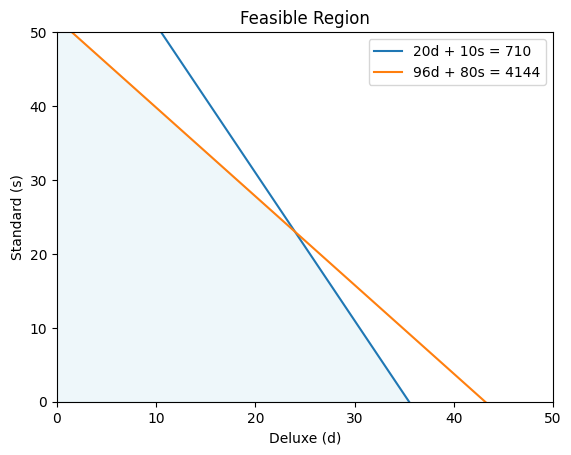

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

d = np.linspace(0, 50, 100)
s1 = (710 - 20*d)/10
s2 = (4144 - 96*d)/80

plt.plot(d, s1, label='20d + 10s = 710')
plt.plot(d, s2, label='96d + 80s = 4144')
plt.xlim(0,50)
plt.ylim(0,50)
plt.fill_between(d, np.minimum(s1,s2), 0, where=(np.minimum(s1,s2)>0), alpha=0.2, color='lightblue')
plt.xlabel('Deluxe (d)')
plt.ylabel('Standard (s)')
plt.legend()
plt.title('Feasible Region')
plt.show()


Find the corner that maximizes the objective

In [ ]:
def revenue(d,s):
    return 342*d + 190*s

points = [(0,0),(0,51.8),(24,23),(35.5,0)]
for p in points:
    print(p, "revenue =", revenue(p[0],p[1]))


(0, 0) revenue = 0
(0, 51.8) revenue = 9842.0
(24, 23) revenue = 12578
(35.5, 0) revenue = 12141.0


Introduce slack variables

Add slack variables to turn inequalities into equalities:

\[
\begin{cases}
20d + 10s + s_1 = 710 \\
96d + 80s + s_2 = 4144 \\
d, s, s_1, s_2 \ge 0
\end{cases}
\]


In [ ]:
print("20d + 10s + s1 = 710")
print("96d + 80s + s2 = 4144")
print("d, s, s1, s2 >= 0")


20d + 10s + s1 = 710
96d + 80s + s2 = 4144
d, s, s1, s2 >= 0


In [ ]:
Solve

In [ ]:
from scipy.optimize import linprog

c = [-342, -190]
A_ub = [[20,10],[96,80]]
b_ub = [710,4144]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=(0,None))
print("Optimal deluxe:", res.x[0])
print("Optimal standard:", res.x[1])
print("Maximum revenue:", -res.fun)


Optimal deluxe: 24.0
Optimal standard: 23.0
Maximum revenue: 12578.0
